## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### The data used in this project was compiled by the Global Shark Attack File.  
http://www.sharkattackfile.net/index.htm

In [ ]:
### . below is the link to the image - may need to screen shot

http://sudeep.co/images/post_images/2018-02-09-Understanding-the-Data-Science-Lifecycle/chart.png

### The following information was taken from the Global Shark Attack File website.

INCIDENTS INVOLVING WATERCRAFT – INCIDENTS IN WHICH A BOAT WAS BITTEN OR RAMMED BY A SHARK ARE IN GREEN. HOWEVER, IN CASES IN WHICH THE SHARK WAS HOOKED, NETTED OR GAFFED, THE ENTRY IS ORANGE BECAUSE THEY ARE CLASSED AS PROVOKED INCIDENTS.

QUESTIONABLE INCIDENTS - INCIDENTS IN WHICH THERE ARE INSUFFICIENT DATA TO DETERMINE IF THE INJURY WAS CAUSED BY A SHARK OR THE PERSON DROWNED AND THE BODY WAS LATER SCAVENGED BY SHARKS. IN A FEW CASES, DESPITE MEDIA REPORTS TO THE CONTRARY, EVIDENCE INDICATED THERE WAS NO SHARK INVOLVEMENT WHATSOEVER. SUCH INCIDENTS ARE IN BLUE.



In [1]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
# plt.style.use('seaborn')

import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('attacks.csv', encoding='latin-1')
print ('shape of the data -', data.shape)

data.head()

shape of the data - (25723, 24)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
data.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for col in data.columns: 
    print(col) 

Case Number
Date
Year
Type
Country
Area
Location
Activity
Name
Sex 
Age
Injury
Fatal (Y/N)
Time
Species 
Investigator or Source
pdf
href formula
href
Case Number.1
Case Number.2
original order
Unnamed: 22
Unnamed: 23


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
Case Number               8702 non-null object
Date                      6302 non-null object
Year                      6300 non-null float64
Type                      6298 non-null object
Country                   6252 non-null object
Area                      5847 non-null object
Location                  5762 non-null object
Activity                  5758 non-null object
Name                      6092 non-null object
Sex                       5737 non-null object
Age                       3471 non-null object
Injury                    6274 non-null object
Fatal (Y/N)               5763 non-null object
Time                      2948 non-null object
Species                   3464 non-null object
Investigator or Source    6285 non-null object
pdf                       6302 non-null object
href formula              6301 non-null object
href                      6302 non-null obje

In [6]:
data.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [7]:
print ('Unnamed: 22 ', data['Unnamed: 22'].unique())
print ('Unnamed: 23 ', data['Unnamed: 22'].unique())
data = data.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1)

Unnamed: 22  [nan 'stopped here']
Unnamed: 23  [nan 'stopped here']


In [8]:
data = data.drop(['Case Number', 'pdf', 'original order', 'Location', 'Name'], axis=1)
data = data.drop(['Investigator or Source', 'Case Number.1', 'Case Number.2'], axis=1)
data = data.drop(['Date', 'href formula', 'href', 'Injury'], axis=1)

data.head()

,Year,Type,Country,Area,Activity,Sex,Age,Fatal (Y/N),Time,Species
0,2018.0,Boating,USA,California,Paddling,F,57,N,18h00,White shark
1,2018.0,Unprovoked,USA,Georgia,Standing,F,11,N,14h00 -15h00,NaN
2,2018.0,Invalid,USA,Hawaii,Surfing,M,48,N,07h45,NaN
3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,M,NaN,N,NaN,2 m shark
4,2018.0,Provoked,MEXICO,Colima,Free diving,M,NaN,N,NaN,"Tiger shark, 3m"


In [9]:
data['Year'].value_counts()

2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
0.0       125
2008.0    122
2013.0    122
2009.0    120
2012.0    117
2007.0    112
2006.0    103
2005.0    103
2010.0    101
2000.0     97
1959.0     93
1960.0     93
2003.0     92
2004.0     92
2001.0     92
2002.0     88
1962.0     86
1961.0     78
1995.0     76
1999.0     66
1964.0     66
1998.0     65
1963.0     61
1996.0     61
1966.0     58
         ... 
1784.0      1
1617.0      1
1764.0      1
1721.0      1
1792.0      1
1834.0      1
1841.0      1
1595.0      1
1755.0      1
1738.0      1
1807.0      1
1723.0      1
1804.0      1
1780.0      1
1801.0      1
1767.0      1
1815.0      1
1822.0      1
1818.0      1
1783.0      1
1797.0      1
1800.0      1
1771.0      1
1748.0      1
1555.0      1
1753.0      1
77.0        1
1785.0      1
1580.0      1
1543.0      1
Name: Year, Length: 249, dtype: int64

In [10]:
data = data[data['Year'] > 1850]
print ('Null values: ', data['Year'].isnull().sum())
data['Year'] = data['Year'].astype(int)
data['Year'].value_counts()

Null values:  0


2015    143
2017    136
2016    130
2011    128
2014    127
2013    122
2008    122
2009    120
2012    117
2007    112
2005    103
2006    103
2010    101
2000     97
1959     93
1960     93
2001     92
2004     92
2003     92
2002     88
1962     86
1961     78
1995     76
1964     66
1999     66
1998     65
1963     61
1996     61
1966     58
1997     57
       ... 
1852     10
1903     10
1891      9
1876      9
1871      9
1881      9
1885      9
1889      9
1901      9
1853      8
1872      8
1879      8
1870      8
1884      7
1860      7
1855      7
1868      6
1858      6
1875      5
1867      5
1861      5
1918      5
1865      4
1873      4
1856      4
1851      3
1869      2
1866      2
1859      1
1857      1
Name: Year, Length: 167, dtype: int64

In [11]:
data.tail()

,Year,Type,Country,Area,Activity,Sex,Age,Fatal (Y/N),Time,Species
6023,1852,Unprovoked,USA,South Carolina,"Vessel capsized, wading ashore carrying an oar",M,NaN,Y,NaN,NaN
6024,1851,Unprovoked,MEXICO,Oaxaca,Bathing,M,NaN,Y,NaN,NaN
6025,1851,Unprovoked,USA,Hawaii,Swimming,M,NaN,Y,NaN,NaN
6026,1851,Unprovoked,USA,California,Hard hat diving,M,NaN,N,NaN,18' shark
6125,1896,Sea Disaster,USA,NaN,NaN,M,NaN,NaN,NaN,NaN


In [12]:
print ('Type: ', data['Type'].unique())
data['Type'].value_counts()

Type:  ['Boating' 'Unprovoked' 'Invalid' 'Provoked' 'Questionable' 'Sea Disaster'
 nan 'Boat' 'Boatomg']


Unprovoked      4368
Provoked         564
Invalid          529
Sea Disaster     225
Boating          203
Boat             130
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [13]:
data['Type'] = data['Type'].replace('Boatomg', 'Boating')
data['Type'] = data['Type'].replace('Boat', 'Boating')
data['Type'] = data['Type'].fillna('Unknown')

print ('Null values: ', data['Type'].isnull().sum())
data['Type'].value_counts()

Null values:  0


Unprovoked      4368
Provoked         564
Invalid          529
Boating          334
Sea Disaster     225
Unknown            4
Questionable       2
Name: Type, dtype: int64

In [14]:
print ('Country: ', data['Country'].unique())
print ('\nValue Counts:\n', data['Country'].value_counts())

Country:  ['USA' 'AUSTRALIA' 'MEXICO' 'BRAZIL' 'ENGLAND' 'SOUTH AFRICA' 'THAILAND'
 'COSTA RICA' 'MALDIVES' 'BAHAMAS' 'NEW CALEDONIA' 'ECUADOR' 'MALAYSIA'
 'LIBYA' nan 'CUBA' 'MAURITIUS' 'NEW ZEALAND' 'SPAIN' 'SAMOA'
 'SOLOMON ISLANDS' 'JAPAN' 'EGYPT' 'ST HELENA, British overseas territory'
 'COMOROS' 'REUNION' 'FRENCH POLYNESIA' 'UNITED KINGDOM'
 'UNITED ARAB EMIRATES' 'PHILIPPINES' 'INDONESIA' 'CHINA' 'COLUMBIA'
 'CAPE VERDE' 'Fiji' 'DOMINICAN REPUBLIC' 'CAYMAN ISLANDS' 'ARUBA'
 'MOZAMBIQUE' 'FIJI' 'PUERTO RICO' 'ITALY' 'ATLANTIC OCEAN' 'GREECE'
 'ST. MARTIN' 'FRANCE' 'PAPUA NEW GUINEA' 'TRINIDAD & TOBAGO' 'KIRIBATI'
 'ISRAEL' 'DIEGO GARCIA' 'TAIWAN' 'JAMAICA' 'PALESTINIAN TERRITORIES'
 'GUAM' 'SEYCHELLES' 'BELIZE' 'NIGERIA' 'TONGA' 'SCOTLAND' 'CANADA'
 'CROATIA' 'SAUDI ARABIA' 'CHILE' 'ANTIGUA' 'KENYA' 'RUSSIA'
 'TURKS & CAICOS' 'UNITED ARAB EMIRATES (UAE)' 'AZORES' 'SOUTH KOREA'
 'MALTA' 'VIETNAM' 'MADAGASCAR' 'PANAMA' 'SOMALIA' 'NEVIS'
 'BRITISH VIRGIN ISLANDS' 'NORWAY' 'SENEGAL' 

In [15]:
print ('\nCountries with less than 10 attacks:', (data['Country'].value_counts() < 10).sum())
data['Country'] = data['Country'].fillna('UNKNOWN')
print ('Country Null values: ', data['Country'].isnull().sum())


Countries with less than 10 attacks: 150
Country Null values:  0


In [16]:
# eliminate countries with attacks < 10
country_counts = data['Country'].value_counts()
data = data[data['Country'].isin(country_counts.index[country_counts >= 10]).values]

print ('Value Counts:\n', data['Country'].value_counts())

Value Counts:
 USA                     2181
AUSTRALIA               1294
SOUTH AFRICA             571
PAPUA NEW GUINEA         130
NEW ZEALAND              127
BRAZIL                   111
BAHAMAS                  106
MEXICO                    85
ITALY                     67
PHILIPPINES               61
REUNION                   58
FIJI                      57
NEW CALEDONIA             53
MOZAMBIQUE                43
CUBA                      41
SPAIN                     40
UNKNOWN                   37
EGYPT                     37
CROATIA                   34
JAPAN                     34
PANAMA                    29
INDIA                     29
SOLOMON ISLANDS           28
IRAN                      25
HONG KONG                 24
FRENCH POLYNESIA          23
JAMAICA                   22
INDONESIA                 22
GREECE                    18
ATLANTIC OCEAN            17
COSTA RICA                17
ENGLAND                   16
PACIFIC OCEAN             16
TONGA                     15

In [17]:
# checking the size of the data
data.shape

(5605, 10)

In [18]:
print ('Area: ', data['Area'].unique())
data['Area'].value_counts()

Area:  ['California' 'Georgia' 'Hawaii' 'New South Wales' 'Colima' 'Pernambuco'
 'Florida' 'Queensland' 'South Carolina' 'Cornwall' 'Westerm Australia'
 'Eastern Cape Province' 'Cocos Island' 'Western Australia'
 'Western Cape Province' 'New Providence' 'Alagoas' nan 'Victoria'
 'KwaZulu-Natal' 'Boi Island, Victoria' 'Fernando de Noronha'
 'Holquin Province' 'Pamplemousses ' 'South Australia' 'North Island'
 'New York' 'Canary Islands' 'Shizuoka Prefecture' 'Texas' 'Castellón'
 'Massachusetts' 'Red Sea Protectorate' 'New Providence District'
 '40 miles off Grand Bahama Island' 'New Jersey' 'Majorca' 'Washington'
 'Tabasco' 'Ibiza Island' 'Marquesas' 'South Devon' 'New Providence '
 'Baja California Sur' 'Saint-Leu' 'South Island' 'Luzon Island'
 'Great Exuma' 'Saint-Andre' 'Bimini' 'Bali' 'Tuamotos' 'Oregon'
 'North Province' 'New Providence Island' 'Alicante Province'
 'Kochi Prefecture' 'Tasmania' 'Abaco Islands' 'Alabama' 'North Carolina'
 'Suez' 'Grand Terre' 'Santa Catarina State'

Florida                                  1024
New South Wales                           468
Queensland                                304
Hawaii                                    291
California                                287
KwaZulu-Natal                             208
Western Cape Province                     193
Western Australia                         184
Eastern Cape Province                     159
South Carolina                            150
South Australia                           102
North Carolina                            100
Victoria                                   89
Pernambuco                                 74
Texas                                      73
Torres Strait                              67
North Island                               66
New Jersey                                 49
South Island                               40
Tasmania                                   38
Oregon                                     29
New York                          

In [19]:
data['Area'] = data['Area'].fillna('Unknown')
print ('\nAreas with less than 10:', (data['Area'].value_counts() < 10).sum())
print ('Area Null Values: ', data['Area'].isnull().sum())

# Eliminate data where area is less than 10 attacks
area_counts = data['Area'].value_counts()
data = data[data['Area'].isin(area_counts.index[area_counts >= 10]).values]


Areas with less than 10: 521
Area Null Values:  0


In [20]:
data['Activity'] = data['Activity'].fillna('Unknown')

print ('Activity: ', data['Activity'].unique())
print ('\nActivity Null Values: ', data['Activity'].isnull().sum())
data['Activity'].value_counts()

Activity:  ['Paddling' 'Standing' 'Surfing' ... 'Swimming from capsized boat'
 'Wreck of the steamship Birkenhead'
 'Vessel capsized, wading ashore carrying an oar']

Activity Null Values:  0


Surfing                                                                   898
Swimming                                                                  628
Unknown                                                                   347
Fishing                                                                   289
Spearfishing                                                              234
Wading                                                                    129
Bathing                                                                   110
Standing                                                                   84
Diving                                                                     78
Snorkeling                                                                 57
Body boarding                                                              52
Scuba diving                                                               48
Body surfing                                                    

In [21]:
data['Activity'] = data['Activity'].replace('Boogie Boarding', 'Body boarding')
data['Activity'] = data['Activity'].replace('Boogie boarding', 'Body boarding')
data['Activity'] = data['Activity'].replace('"Riding waves on a board"', 'Body boarding')

data['Activity'] = data['Activity'].replace('Swimming', 'Swimming/Treading water')
data['Activity'] = data['Activity'].replace('Swimming ', 'Swimming/Treading water')
data['Activity'] = data['Activity'].replace('Swimming or snorkeling ', 'Swimming/Treading water')
#data['Activity'] = data['Activity'].replace('Swimming & spashing', 'Swimming/Treading water')
# look for spaces in data
data['Activity'] = data['Activity'].replace('Floating on his back', 'Floating')

data['Activity'] = data['Activity'].replace('Swimming, towing surfboard', 'Surfing')
data['Activity'] = data['Activity'].replace('Surfing ', 'Surfing')
data['Activity'] = data['Activity'].replace('Surfing (sitting on his board)', 'Surfing')
data['Activity'] = data['Activity'].replace('Sitting on surfboard', 'Surf skiing')
data['Activity'] = data['Activity'].replace('Surf skiing ', 'Surfing')

data['Activity'] = data['Activity'].replace('Swimming / treading water', 'Swimming/Treading water')
data['Activity'] = data['Activity'].replace('Treading water', 'Swimming/Treading water')

data['Activity'] = data['Activity'].replace('Fishing for sharks', 'Shark fishing')
data['Activity'] = data['Activity'].replace('Fishing for white shark', 'Shark fishing')

data['Activity'] = data['Activity'].replace('Fishing for rock lobster', 'Fishing')
data['Activity'] = data['Activity'].replace('Fishing ', 'Fishing')
data['Activity'] = data['Activity'].replace('Swimming with speared fish', 'Spearfishing')
data['Activity'] = data['Activity'].replace('Spearfishing ', 'Spearfishing')


data['Activity'] = data['Activity'].replace('Walking', 'Wading/Standing')
data['Activity'] = data['Activity'].replace('Wading', 'Wading/Standing')
data['Activity'] = data['Activity'].replace('Standing', 'Wading/Standing')

data['Activity'] = data['Activity'].replace('Scuba Diving', 'Scuba diving')
data['Activity'] = data['Activity'].replace('Kayaking', 'Kayak/Canoeing')
data['Activity'] = data['Activity'].replace('Canoeing', 'Kayak/Canoeing')
data['Activity'] = data['Activity'].replace('Rowing', 'Kayak/Canoeing')
data['Activity'] = data['Activity'].replace('Paddleskiing', 'Kayak/Canoeing')

data['Activity'] = data['Activity'].replace('Stand-Up Paddleboarding', 'Paddle boarding')

data['Activity'] = data['Activity'].replace('Surf-skiing', 'Surf skiing')

data['Activity'] = data['Activity'].replace('Freediving', 'Diving')
data['Activity'] = data['Activity'].replace('Free diving', 'Diving')
data['Activity'] = data['Activity'].replace('Skindiving', 'Diving')
data['Activity'] = data['Activity'].replace('Sponge diving', 'Diving')
data['Activity'] = data['Activity'].replace('Diving for trochus', 'Diving')
data['Activity'] = data['Activity'].replace('Diving for sand dollars', 'Diving')
data['Activity'] = data['Activity'].replace('Diving on a wreck', 'Diving')

data['Activity'] = data['Activity'].replace('Shell Diving', 'Diving')
data['Activity'] = data['Activity'].replace('Pearl diving', 'Diving')
data['Activity'] = data['Activity'].replace('Pearl diving from lugger', 'Diving')

data['Activity'] = data['Activity'].replace('Diving for abalone', 'Diving')
data['Activity'] = data['Activity'].replace('Free diving for abalone', 'Diving')
data['Activity'] = data['Activity'].replace('Free diving for sinkers', 'Diving')
data['Activity'] = data['Activity'].replace('Free diving for crayfish', 'Diving')
data['Activity'] = data['Activity'].replace('Scallop diving (using surface-supplied air & a POD)', 'Diving')
data['Activity'] = data['Activity'].replace('SCUBA Diving', 'Scuba diving')

data['Activity'] = data['Activity'].replace('Fell overboard from the Malacca', 'Fell overboard')
data['Activity'] = data['Activity'].replace('Fell overboard from USS cruiser Tacoma', 'Fell overboard')
data['Activity'] = data['Activity'].replace('Fell overboard from the steamship Chala', 'Fell overboard')
data['Activity'] = data['Activity'].replace('Fell overboard from USS cruiser Tacoma', 'Fell overboard')
data['Activity'] = data['Activity'].replace('Fell overboard from USS cruiser Tacoma', 'Fell overboard')

data['Activity'] = data['Activity'].replace('Sea Disaster', 'Sea disaster/Wreck')
data['Activity'] = data['Activity'].replace('Sea disaster', 'Sea disaster/Wreck')
data['Activity'] = data['Activity'].replace('Wreck of the Tweed', 'Sea disaster/Wreck')
data['Activity'] = data['Activity'].replace('Wreck of  large double siling canoe', 'Sea disaster/Wreck')
data['Activity'] = data['Activity'].replace('Wreck of the steamship Birkenhead', 'Sea disaster/Wreck')
data['Activity'] = data['Activity'].replace('Sea Disaster Sinking of ferryboat Christina', 'Sea disaster/Wreck')
data['Activity'] = data['Activity'].replace('The coastwise steamer San Basilio capsized in a typhoon', 'Sea disaster/Wreck')

data['Activity'] = data['Activity'].replace('Kite Surfing', 'Kite surfing')
data['Activity'] = data['Activity'].replace('Kayaking / Fishing', 'Kayak Fishing')
data['Activity'] = data['Activity'].replace('Fell into the water', 'Fell overboard')

data['Activity'] = data['Activity'].replace('Sailing', 'Sailing/Boating')
data['Activity'] = data['Activity'].replace('Boat', 'Sailing/Boating')

# Eliminate data where area is less than 10 attacks
activity_counts = data['Activity'].value_counts()
data = data[data['Activity'].isin(activity_counts.index[activity_counts >= 5]).values]

data['Activity'].value_counts()

Surfing                    917
Swimming/Treading water    694
Unknown                    347
Fishing                    301
Spearfishing               236
Wading/Standing            229
Diving                     163
Bathing                    110
Body boarding               95
Kayak/Canoeing              59
Snorkeling                  57
Scuba diving                55
Body surfing                46
Surf skiing                 33
Fell overboard              23
Shark fishing               21
Kayak Fishing               16
Floating                    16
Windsurfing                 15
Paddle boarding             14
Sailing/Boating             13
Surf fishing                12
Kite surfing                10
Sea disaster/Wreck           8
Playing                      7
Name: Activity, dtype: int64

In [22]:
#  check the values for the Sex column
print ('Sex: ', data['Sex '].unique())
print ('Null values: ', data['Sex '].isnull().sum())

print ('\nValue Counts:\n', data['Sex '].value_counts())
data = data.rename(columns={"Sex ": "Sex"})


Sex:  ['F' 'M' nan 'M ' 'lli' 'N']
Null values:  262

Value Counts:
 M      2844
F       387
M         2
N         1
lli       1
Name: Sex , dtype: int64


In [23]:
data['Sex'] = data['Sex'].fillna('U')
data['Sex'] = data['Sex'].replace('M ', 'M')
data['Sex'] = data['Sex'].replace('N', 'U')
data['Sex'] = data['Sex'].replace('lli', 'U')
data['Sex'] = data['Sex'].replace('.', 'U')
data['Sex'].value_counts()


M    2846
F     387
U     264
Name: Sex, dtype: int64

In [24]:
#  check the values of the Age column
print ('Age: ', data['Age'].unique())
print ('\nNull values: ', data['Age'].isnull().sum())

print ('\nValue Counts:\n', data['Age'].value_counts())

Age:  ['11' '48' nan '18' '52' '15' '12' '10' '60' '29' '34' '41' '37' '19' '25'
 '69' '38' '55' '35' '14' '40s' '28' '54' '24' '7' '31' '17' '40' '33' '3'
 '13' '8' '46' '16' '73' '20s' '68' '21' '51' '58' '30' '26' '22' 'Teen'
 '57' '47' '20' '61' '65' '42' '36' '66' '43' '60s' '50' '9' '49' '59'
 '27' '64' '39' '45' '71' '32' '44' '62' '23' '6' '63' '70' '53' '50s'
 'teen' '77' '56' '30s' '86' '12 or 13' 'Teens' '36 & 26' '8 or 10' '84'
 '\xa0 ' '30 or 36' '6½' '33 or 37' 'mid-30s' '5' ' 30' ' 28' '20?' "60's"
 '16 to 18' '87' '67' 'Elderly' 'mid-20s' 'Ca. 33' '75' ' ' '21 or 26'
 '20 ' '>50' 'adult' '25 or 28' '50 & 30' '2 to 3 months'
 'MAKE LINE GREEN' ' 43' '78' '17 & 16' '  ' 'A.M.' '?    &   14'
 '10 or 12' '31 or 33' '2½' '1']

Null values:  1253

Value Counts:
 17               109
18               106
16                98
15                93
20                91
19                88
14                81
21                79
22                76
25                74
24     

In [25]:
data['Age'] = data['Age'].replace('teen', '16')
data['Age'] = data['Age'].replace('Teen', '16')

# eliminate ages with attacks < 5
age_counts = data['Age'].value_counts()
data = data[data['Age'].isin(age_counts.index[age_counts >= 5]).values]

print ('Value Counts:\n', data['Age'].value_counts())
print ('\nNull values: ', data['Age'].isnull().sum())

Value Counts:
 16    109
17    109
18    106
15     93
20     91
19     88
14     81
21     79
22     76
25     74
24     68
13     65
26     57
23     50
29     50
12     50
28     47
35     44
27     44
32     43
30     40
10     38
31     34
40     34
34     32
43     29
37     29
11     26
52     25
36     25
9      24
38     24
8      23
42     23
39     22
41     21
44     21
33     21
50     21
45     20
49     18
47     17
46     16
54     14
7      14
51     14
48     13
55     12
61     12
6      11
58     10
60     10
57     10
59      8
63      7
53      6
68      6
Name: Age, dtype: int64

Null values:  0


In [ ]:
''''' an optional age cleaning attempt

https://stackoverflow.com/questions/4289331/how-to-extract-numbers-from-a-string-in-python

If you only want to extract only positive integers, try the following:

>>> str = "h3110 23 cat 444.4 rabbit 11 2 dog"
>>> [int(s) for s in str.split() if s.isdigit()]
[23, 11, 2]

>>> import re
>>> re.findall(r'\d+', 'hello 42 I\'m a 32 string 30')
['42', '32', '30']
This would also match 42 from bla42bla. If you only want numbers delimited by word boundaries (space, period, comma), you can use \b :

>>> re.findall(r'\b\d+\b', 'he33llo 42 I\'m a 32 string 30')
['42', '32', '30']
To end up with a list of numbers instead of a list of strings:

>>> [int(s) for s in re.findall(r'\b\d+\b', 'he33llo 42 I\'m a 32 string 30')]
[42, 32, 30]

to convert dataframe values to a list
df.values.tolist()

'''''

In [ ]:
ages = data['Age'].values.tolist()
new_list = []

import re
for age in ages:
    age = [int(age) for age in re.findall(r'\d+', str(age))]
   # print (age)
    if len(age) != 0 :
        new_list.append(age[0])

In [ ]:
data['Ages'] = pd.DataFrame(new_list)
data['Ages'] = data['Ages'].fillna(data['Ages'].mean().astype(int))
print ('\nValue Counts:\n', data['Ages'].value_counts())

In [26]:
#  check the values of Fatal column
print ('Fatal (Y/N): ', data['Fatal (Y/N)'].unique())
print ('\nNull values: ', data['Fatal (Y/N)'].isnull().sum())

print ('\nValue Counts:\n', data['Fatal (Y/N)'].value_counts())

Fatal (Y/N):  ['N' 'Y' nan 'UNKNOWN' ' N']

Null values:  142

Value Counts:
 N          1735
Y           267
UNKNOWN       8
 N            2
Name: Fatal (Y/N), dtype: int64


In [27]:
data['Fatal (Y/N)'] = data['Fatal (Y/N)'].fillna('UNKNOWN')

data['Fatal (Y/N)'] = data['Fatal (Y/N)'].replace('y', 'Yes')
data['Fatal (Y/N)'] = data['Fatal (Y/N)'].replace('Y', 'Yes')
data['Fatal (Y/N)'] = data['Fatal (Y/N)'].replace('N ', 'No')
data['Fatal (Y/N)'] = data['Fatal (Y/N)'].replace('N', 'No')
data['Fatal (Y/N)'] = data['Fatal (Y/N)'].replace(' N', 'No')
data['Fatal (Y/N)'] = data['Fatal (Y/N)'].replace('UNKNOWN', 'Unknown')
data['Fatal (Y/N)'] = data['Fatal (Y/N)'].replace('2017', 'Unknown')
data['Fatal (Y/N)'] = data['Fatal (Y/N)'].replace('M', 'Unknown')

print ('\nValue Counts:\n', data['Fatal (Y/N)'].value_counts())


Value Counts:
 No         1737
Yes         267
Unknown     150
Name: Fatal (Y/N), dtype: int64


In [28]:
#  check the values of Species column
data = data.rename(columns={"Species ": "Species"})
print ('Species: ', data['Species'].unique())
data['Species'] = data['Species'].fillna('Unknown')
print ('\nValue Counts:\n', data['Species'].value_counts())

Species:  [nan 'Tiger shark' "Lemon shark, 3'" "Bull shark, 6'" '3 m shark'
 "6' shark" 'Bull shark' 'White shark' "Tiger shark, 12'"
 'Wobbegong shark' '1.8 m shark' 'Blacktip shark'
 'Juvenile white shark,  2.7 to 3.2 m' 'Bull shark, 2 m' '2m shark'
 'White shark, 3.5 m' "Nurse shark. 5'" 'White shark, 4.6 m' '2 m shark'
 'Cookiecutter shark' 'Wobbegong shark, 1 m' 'White shark, 4.5 m'
 'Tiger shark, 8 to 10 feet' "8' shark"
 'Death may have been due to drowning' 'Questionable' "5' to 6' shark"
 'White shark, 3 to 3.5m ' 'White shark, 3 m'
 'Possibly a juvenile blacktip shark' "4' shark" 'A small shark'
 '"A small shark"' 'Shark involvement not confirmed'
 "White shark, 11' to 13'" "Bull shark, 4' to 5'" 'White shark, 2.5 m'
 'Bull shark, 2m' 'White shark, 4 m' 'Shark involvement highly doubtful'
 'Shark involvement prior to death not confirmed' "Bull shark, 5' to 7'"
 "10' shark" 'Bull shark, 4 m' 'Wobbegong shark, 2m' " 6' to 8' shark"
 "Tiger shark, 10'" "White shark, 8' to 10'" '

In [29]:
#  check the values of the Time column
print ('Time: ', data['Time'].unique())
print ('\nNull values: ', data['Time'].isnull().sum())

print ('\nValue Counts:\n', data['Time'].value_counts())

Time:  ['14h00  -15h00' '07h45' 'Late afternoon' nan '17h00' '14h00' '15h00'
 '09h30' '08h00' '18h00' '17h35' '07h30' '19h00, Dusk' '16h00' '12h00'
 '13h45' '09h00' 'Afternoon' '18h30' '12h30' '15h30' '16h30' '18h45'
 '06h00' '10h44' '10h30' '13h30' '23h30' '11h20' '10h00' '08h30' '14h30'
 '17h10' '11h00' '17h45' '13h00' '10h20' '13h20' '07h00' '02h00' '11h30'
 '9h00' '10h43' 'After noon' '15h40' '1300' '14h30 / 15h30' '22h00'
 '16h20' '14h34' '15h25' '15h45' '17h46' 'Morning ' '15h49' '17h30'
 '19h00' 'Morning' '18h15' '14h50' '13h50' '19h20' '10h25' '16h50' '16h45'
 '15h52' '06h15' '14h40' '10h10' '08h45' 'Evening' '12h10' '12h25' '17h51'
 '16h12' '12h45' '10h50' '14h15' '09h45' '06h45' '05h00' '03h30'
 'Sometime between 06h00 & 08hoo' '06h30' '10h45' '20h00' '16h40'
 'Early afternoon' '17h50' '18h15-18h30' '09h57' '08h20' 'Night' '20h30'
 '16h05' '14h10' '11h15' '15h20' '12h50' '14h45' '13h40' '13h24' '0830'
 '09h40' '08h10' '15h56' '14h20' '07h56' '16h35' '11h45' '09h05' '19h45'
 '

In [30]:
# replace null values with 'Unknown'
data['Time'] = data['Time'].fillna('Unknown')

# Categorize times
data['Time'] = data['Time'].replace('--', 'Unknown')


data['Time'] = data['Time'].replace('Morning ', 'Morning')
data['Time'] = data['Time'].replace('02h00', 'Morning')
data['Time'] = data['Time'].replace('03h00', 'Morning')
data['Time'] = data['Time'].replace('04h00', 'Morning')
data['Time'] = data['Time'].replace('05h00', 'Morning')

data['Time'] = data['Time'].replace('06h00', 'Morning')
data['Time'] = data['Time'].replace('06h30', 'Morning')
data['Time'] = data['Time'].replace('06h45', 'Morning')

data['Time'] = data['Time'].replace('07h00', 'Morning')
data['Time'] = data['Time'].replace('07h15', 'Morning')
data['Time'] = data['Time'].replace('07h30', 'Morning')
data['Time'] = data['Time'].replace('07h45', 'Morning')
data['Time'] = data['Time'].replace('08h00', 'Morning')
data['Time'] = data['Time'].replace('08h00', 'Morning')
data['Time'] = data['Time'].replace('08h15', 'Morning')
data['Time'] = data['Time'].replace('08h30', 'Morning')
data['Time'] = data['Time'].replace('08h45', 'Morning')

data['Time'] = data['Time'].replace('09h00', 'Morning')
data['Time'] = data['Time'].replace('09h15', 'Morning')
data['Time'] = data['Time'].replace('09h30', 'Morning')
data['Time'] = data['Time'].replace('09h45', 'Morning')

data['Time'] = data['Time'].replace('10h00', 'Morning')
data['Time'] = data['Time'].replace('10h15', 'Morning')
data['Time'] = data['Time'].replace('10h20', 'Morning')
data['Time'] = data['Time'].replace('10h25', 'Morning')
data['Time'] = data['Time'].replace('10h30', 'Morning')
data['Time'] = data['Time'].replace('10h40', 'Morning')
data['Time'] = data['Time'].replace('10h45', 'Morning')
data['Time'] = data['Time'].replace('10h55', 'Morning')
data['Time'] = data['Time'].replace('11h00', 'Morning')
data['Time'] = data['Time'].replace('11h10', 'Morning')
data['Time'] = data['Time'].replace('11h15', 'Morning')
data['Time'] = data['Time'].replace('11h20', 'Morning')
data['Time'] = data['Time'].replace('11h30', 'Morning')
data['Time'] = data['Time'].replace('11h45', 'Morning')
data['Time'] = data['Time'].replace('Early morning', 'Morning')
data['Time'] = data['Time'].replace('A.M.', 'Morning')

data['Time'] = data['Time'].replace('12h00', 'Afternoon')
data['Time'] = data['Time'].replace('12h05', 'Afternoon')
data['Time'] = data['Time'].replace('12h15', 'Afternoon')
data['Time'] = data['Time'].replace('12h20', 'Afternoon')
data['Time'] = data['Time'].replace('12h30', 'Afternoon')
data['Time'] = data['Time'].replace('12h40', 'Afternoon')
data['Time'] = data['Time'].replace('12h45', 'Afternoon')

data['Time'] = data['Time'].replace('13h00', 'Afternoon')
data['Time'] = data['Time'].replace('13h15', 'Afternoon')
data['Time'] = data['Time'].replace('13h20', 'Afternoon')
data['Time'] = data['Time'].replace('13h30', 'Afternoon')
data['Time'] = data['Time'].replace('13h40', 'Afternoon')
data['Time'] = data['Time'].replace('13h45', 'Afternoon')

data['Time'] = data['Time'].replace('14h00', 'Afternoon')
data['Time'] = data['Time'].replace('14h10', 'Afternoon')
data['Time'] = data['Time'].replace('14h15', 'Afternoon')
data['Time'] = data['Time'].replace('14h20', 'Afternoon')
data['Time'] = data['Time'].replace('14h30', 'Afternoon')
data['Time'] = data['Time'].replace('14h40', 'Afternoon')
data['Time'] = data['Time'].replace('14h45', 'Afternoon')
data['Time'] = data['Time'].replace('14h50', 'Afternoon')
data['Time'] = data['Time'].replace('15h00', 'Afternoon')
data['Time'] = data['Time'].replace('15h15', 'Afternoon')
data['Time'] = data['Time'].replace('15h20', 'Afternoon')
data['Time'] = data['Time'].replace('15h30', 'Afternoon')
data['Time'] = data['Time'].replace('15h35', 'Afternoon')
data['Time'] = data['Time'].replace('15h45', 'Afternoon')
data['Time'] = data['Time'].replace('16h00', 'Afternoon')
data['Time'] = data['Time'].replace('16h05', 'Afternoon')
data['Time'] = data['Time'].replace('16h10', 'Afternoon')
data['Time'] = data['Time'].replace('16h15', 'Afternoon')
data['Time'] = data['Time'].replace('16h20', 'Afternoon')
data['Time'] = data['Time'].replace('16h30', 'Afternoon')
data['Time'] = data['Time'].replace('16h40', 'Afternoon')
data['Time'] = data['Time'].replace('16h45', 'Afternoon')
data['Time'] = data['Time'].replace('17h00', 'Afternoon')
data['Time'] = data['Time'].replace('17h10', 'Afternoon')

data['Time'] = data['Time'].replace('17h15', 'Afternoon')
data['Time'] = data['Time'].replace('17h30', 'Afternoon')
data['Time'] = data['Time'].replace('17h45', 'Afternoon')
data['Time'] = data['Time'].replace('P.M.', 'Afternoon')
data['Time'] = data['Time'].replace('Midday', 'Afternoon')
data['Time'] = data['Time'].replace('Early afternoon', 'Afternoon')
data['Time'] = data['Time'].replace('Late afternoon', 'Afternoon')

data['Time'] = data['Time'].replace('18h00', 'Evening')
data['Time'] = data['Time'].replace('18h15', 'Evening')
data['Time'] = data['Time'].replace('18h30', 'Evening')
data['Time'] = data['Time'].replace('18h45', 'Evening')
data['Time'] = data['Time'].replace('19h00', 'Evening')
data['Time'] = data['Time'].replace('19h30', 'Evening')
data['Time'] = data['Time'].replace('19h45', 'Evening')
data['Time'] = data['Time'].replace('20h00', 'Evening')
data['Time'] = data['Time'].replace('20h30', 'Evening')
data['Time'] = data['Time'].replace('20h30', 'Evening')
data['Time'] = data['Time'].replace('23h00', 'Evening')

data['Time'] = data['Time'].replace('20h45 (Sunset)', 'Evening')
data['Time'] = data['Time'].replace('18h15-18h30', 'Evening')
data['Time'] = data['Time'].replace('Dusk', 'Evening')
data['Time'] = data['Time'].replace('Sunset', 'Evening')
data['Time'] = data['Time'].replace('Night', 'Evening')


In [31]:
print ('\nValue Counts:\n', data['Time'].value_counts())


Value Counts:
 Afternoon                                                                831
Unknown                                                                  557
Morning                                                                  431
Evening                                                                  136
13h25                                                                      4
08h10                                                                      3
15h50                                                                      3
20h15                                                                      3
10h35                                                                      3
15h40                                                                      3
17h20                                                                      3
17h50                                                                      3
16h50                                                       

## Graph of Attacks by Year

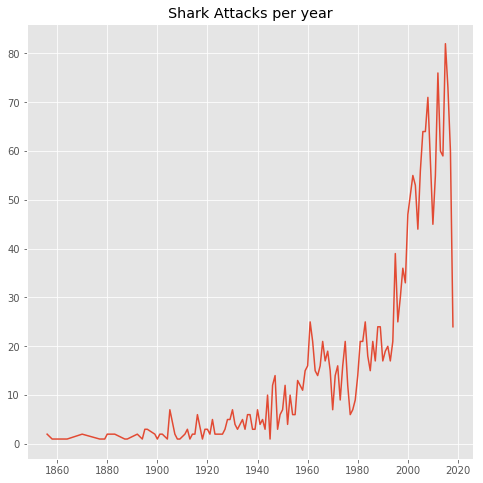

In [32]:
Year_attacks = data['Year'].value_counts().sort_index()
Year_attacks.plot(title="Shark Attacks per year", figsize=(8,8))

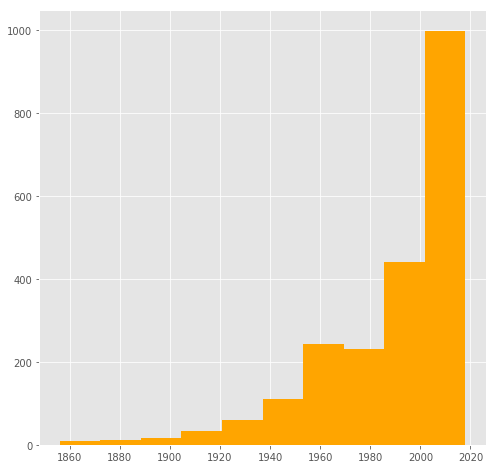

In [33]:
data["Year"].hist(figsize=(8,8), color='orange')

### The increase by year could mainly be from better reporting systems as well as more water sport activities available

## Graph of Attacks by Type

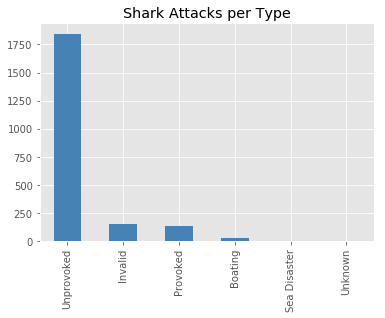

In [34]:
#from matplotlib import cm
#cmap = cm.get_cmap('viridis') # Colour map (there are many others)

data['Type'].value_counts().plot(kind='bar', title="Shark Attacks per Type", color='steelblue')

## Graph of Attacks by Sex of Victim

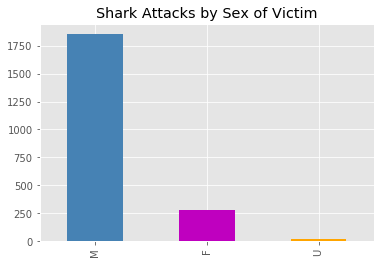

In [35]:
data['Sex'].value_counts().plot(kind='bar', title="Shark Attacks by Sex of Victim", colors=['steelblue', 'm', 'orange'])

## Graph of Attack Fatalities 

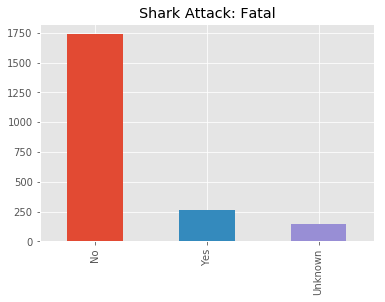

In [36]:
data['Fatal (Y/N)'].value_counts().plot(kind='bar', title="Shark Attack: Fatal")

## Graphs of Ages

### Cleaning Age column and getting maximum useful data.

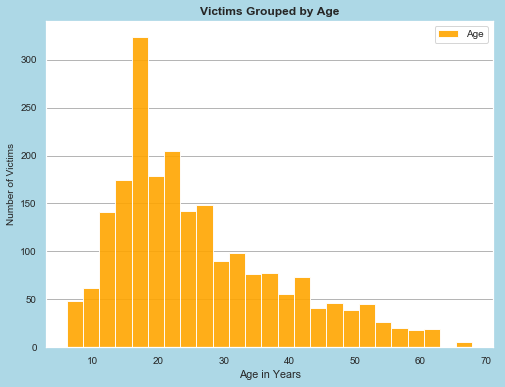

In [37]:
# code from https://www.kaggle.com/sinchetru/11-11-2016-sinchetru-analyzing-shark-attacks

data['Age'] = np.where(pd.to_numeric(data['Age'], 'coerce').notnull(), data['Age'], np.nan)
clean_age = data[['Age']].dropna()
clean_age = clean_age.astype(int)

sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'lightblue'}, font_scale=0.9)
clean_age.plot(kind='hist', figsize=(8,6), alpha=0.9, bins=25, color='orange')
plt.xlabel('Age in Years')
plt.ylabel('Number of Victims', fontsize=10)
plt.title('Victims Grouped by Age', fontsize=12, fontweight='bold')
plt.grid(color='k', axis='y', alpha=0.4, lw=0.8)
plt.show()


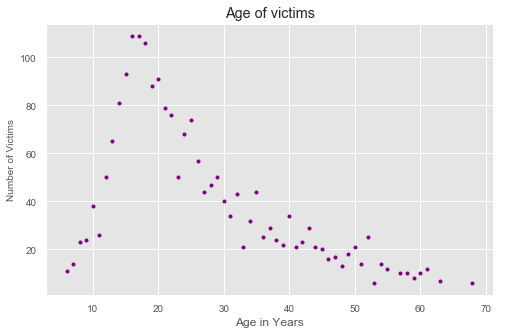

In [38]:
# code for graph taken from: https://www.kaggle.com/franz101/how-deadly-are-sharks-global-shark-attacks-eda
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
# change background back to white
#sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w'}, font_scale=0.9)
#plt.grid(color='k', axis='y', alpha=0.4, lw=0.8)

data['Ages'] = data['Age'].str.extract("([0-9]+)", expand=False).dropna().astype(int)
ages = data['Ages'].value_counts().sort_index()
plt.xlabel('Age in Years')
plt.ylabel('Number of Victims', fontsize=10)
ages.plot(style=".",title = "Age of victims", color='purple', figsize=(8,5))

In [39]:
data.shape

(2154, 11)

In [40]:
data.head()

,Year,Type,Country,Area,Activity,Sex,Age,Fatal (Y/N),Time,Species,Ages
1,2018,Unprovoked,USA,Georgia,Wading/Standing,F,11,No,14h00 -15h00,Unknown,11
2,2018,Invalid,USA,Hawaii,Surfing,M,48,No,Morning,Unknown,48
6,2018,Unprovoked,BRAZIL,Pernambuco,Swimming/Treading water,M,18,Yes,Afternoon,Tiger shark,18
7,2018,Unprovoked,USA,Florida,Fishing,M,52,No,Unknown,"Lemon shark, 3'",52
8,2018,Unprovoked,USA,Florida,Wading/Standing,M,15,No,Afternoon,"Bull shark, 6'",15


In [41]:
times = data['Time'].value_counts()

#subsetting column for < 5, and assigning to uncategorized
data['Time'][data['Time'].isin(times[times < 5].index)] = 'Uncategorized'
data['Time'].value_counts()

Afternoon        831
Unknown          557
Morning          431
Uncategorized    199
Evening          136
Name: Time, dtype: int64

Text(0.5, 1.0, 'Time of Attacks')

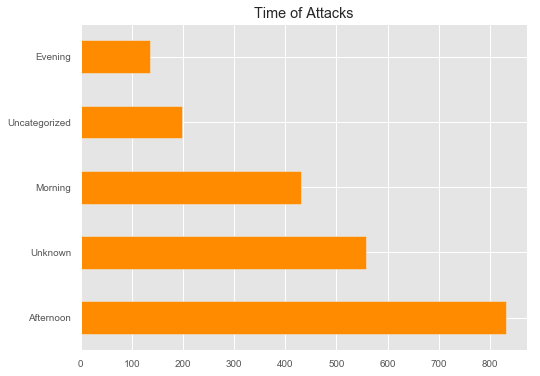

In [42]:
# graph of attacks by time of day
times = data['Time'].value_counts()
times[times > 5].plot.barh(color ='darkorange', figsize=(8,6))
plt.title('Time of Attacks')

Text(0.5, 1.0, 'Shark Species Involved')

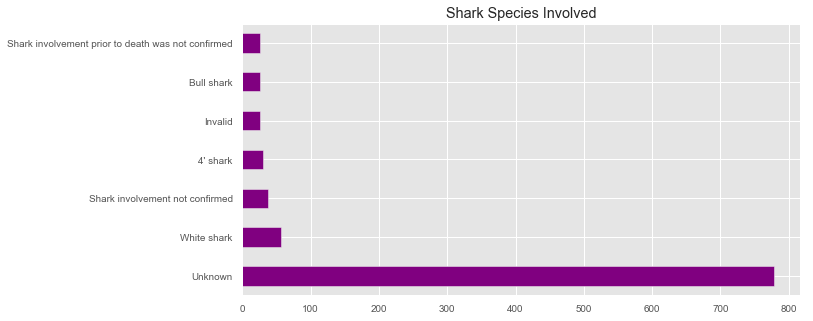

In [43]:
# graph of attacks by species
sharks = data['Species'].value_counts()
sharks[sharks>25].plot.barh(color='purple', figsize=(10,5))
plt.title('Shark Species Involved')

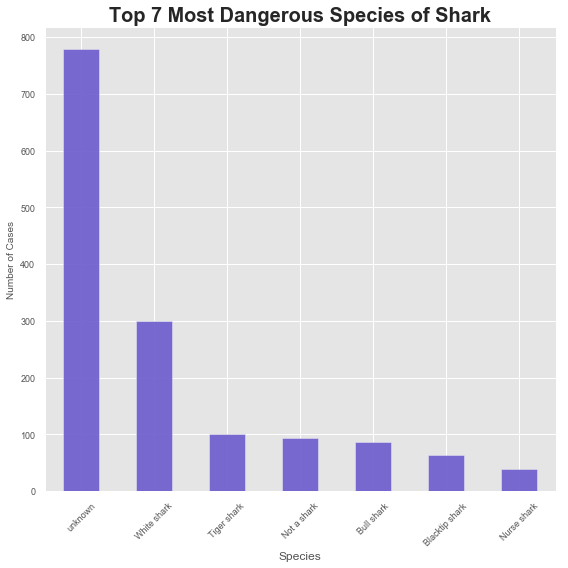

In [44]:
# Code borrowed from link below
# https://www.kaggle.com/sinchetru/11-11-2016-sinchetru-analyzing-shark-attacks

from_re = [r'.*?\bwhite\b\s+\bshark\b.*',r'.*?\bblue\b\s+\bshark\b.*', r'.*?\btiger\b\s.*',
           r'.*?\bbull\b\s.*',r'.*?\bshark\b\s+\binvolvement\b.*',r'.*?\bwobbegong\b\s+\bshark\b.*',
           r'.*?\bblacktip\b\s.*', r'.*?\bbronze\b\s+\bwhaler\b.*', r'.*?\bmako\b\s.*',r'.*?\bnurse\b\s.*',
           r'.*?\bhammerhead\b\s.*', r'.*?\braggedtooth\b\s.*']


to_re = ['White shark', 'Blue shark', 'Tiger shark', 
         'Bull shark', 'Not a shark', 'Wobbegong shark',
         'Blacktip shark','Bronze whaler shark', 'Mako shark', 
         'Nurse shark', 'Hammerhead shark', 'Raggedtooth shark']

data['Species'] = data['Species'].str.lower().replace(from_re, to_re, regex=True)

top = data['Species'].value_counts().head(7)

top.plot(kind='bar', figsize=(8, 8), alpha=0.9, color='slateblue', rot=45, fontsize=9)
plt.xlabel('Species')
plt.ylabel('Number of Cases', fontsize=10)
plt.title('Top 7 Most Dangerous Species of Shark', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Activity')

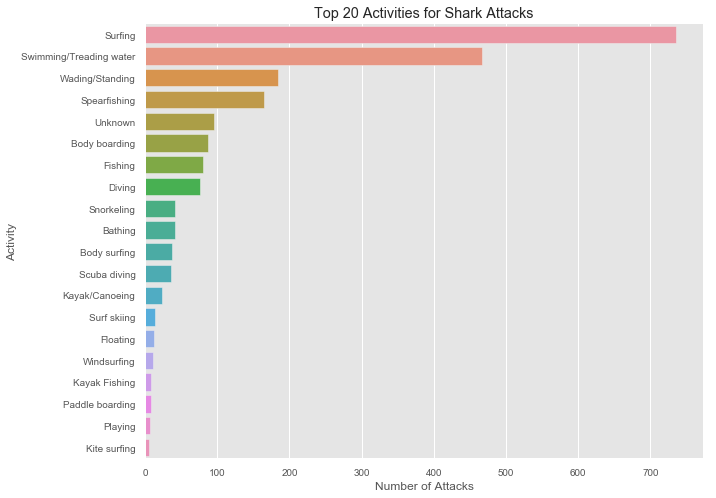

In [45]:
# Code from: https://www.kaggle.com/xingobar/shark-attack-data-visualization
from collections import Counter
   
most_common_activities = Counter(data['Activity'].dropna().tolist()).most_common(20)
activities = [actv_list[0] for actv_list in most_common_activities]
counts = [actv_list[1] for actv_list in most_common_activities]

fig,ax = plt.subplots(figsize=(10,8))
sns.barplot(x = counts , y=activities, ax=ax, orient='h')
plt.title('Top 20 Activities for Shark Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Activity')

# Build Machine Learning Models

## I.  Logistic Regression Model

### Process:

* Define X and y
* Normalization
* Train-Test Split
* Fit a Model
* Predict

### Step 1:  Define X and y

Note that we first have to create our dummy variables, and then can use these to define X and y.


In [46]:
# drop the unknown values for our target variable of 'Fatal (Y/N)'
data = data[data['Fatal (Y/N)'] != 'Unknown']

In [47]:
x_feats = ['Year', 'Type', 'Sex', 'Country', 'Time', 'Age', 'Area', 'Activity']
X = pd.get_dummies(data[x_feats])

y = data['Fatal (Y/N)']
X.head() #Preview our data to make sure it looks reasonable

,Year,Type_Boating,Type_Invalid,Type_Provoked,Type_Sea Disaster,Type_Unprovoked,Sex_F,Sex_M,Sex_U,Country_ATLANTIC OCEAN,...,Activity_Shark fishing,Activity_Snorkeling,Activity_Spearfishing,Activity_Surf fishing,Activity_Surf skiing,Activity_Surfing,Activity_Swimming/Treading water,Activity_Unknown,Activity_Wading/Standing,Activity_Windsurfing
1,2018,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2018,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,2018,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,2018,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2018,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
y.head()

1     No
2     No
6    Yes
7     No
8     No
Name: Fatal (Y/N), dtype: object

In [49]:
# use LabelEncoder for target variable
# documentation at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

from sklearn import preprocessing
y = preprocessing.LabelEncoder().fit_transform(y)

## Step 3: Train-Test Split

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

## Step 4: Fit a Model

In [51]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

## Step 5: Predict

In [52]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [53]:
# We can subtract the two columns. Equal values will have a sum of zero. Then count number of zeros.
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    1094
1     108
dtype: int64
0    0.91015
1    0.08985
dtype: float64


### The classifier was 88% correct with the training data

In [54]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    684
1    118
dtype: int64
0    0.852868
1    0.147132
dtype: float64


### With the test data, it is 86% correct

In [55]:
from sklearn.metrics import roc_curve, auc

#scikit learns built in roc_curve method returns the fpr, tpr and thresholds
#for various decision boundaries given the case member probabilites

#First calculate the probability scores of each of the datapoints:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7732884838528833


AUC: 0.7732884838528833


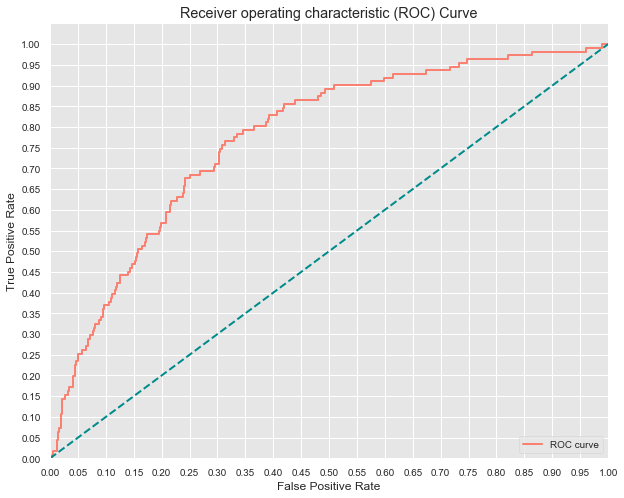

In [56]:
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='salmon',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='darkcyan', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Using a Pipeline with Logistic Regression

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

######### change n components when more features are added
pipe_linreg = Pipeline([('pca', PCA(n_components=50, random_state=123)),
                 ('clf', LogisticRegression(random_state=123))])

# fit the pipeline
pipe_linreg.fit(X_train, y_train)

# print results
print (pipe_linreg.score(X_test, y_test))

0.8690773067331671


In [60]:
np.sum(pipe_linreg.predict(X_test) == y_test)/len(y_test)

0.8690773067331671

## Random Forest Model

In [61]:
# code from https://github.com/stevhliu/dsc-3-final-project-online-ds-sp-000/blob/master/student.ipynb

# import libraries, initialize/fit random forest model and get mean cross validated score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=100, max_depth=5)
rfc.fit(X_train, y_train)
mean_cv_score = np.mean(cross_val_score(rfc, X_train, y_train, 
                                        scoring='accuracy', cv=5))

print('mean cross validation score: ', mean_cv_score)

mean cross validation score:  0.8702203856749312


## Random Forest Pipeline with Gridsearch

In [ ]:
# Code from mod3 sec36 lab

In [62]:
# Construct pipeline
from sklearn.model_selection import GridSearchCV


pipe_rf = Pipeline([('pca', PCA(n_components=25)),     # ???????? change n components
            ('clf', RandomForestClassifier(random_state = 123))])

# Set grid search params      ?????????????
param_grid_forest = [ 
  {'clf_n_estimators': [5],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [4, 5, 6],  
   'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
   'clf__min_samples_split':[0.05 ,0.1, 0.2]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf_n_estimators=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter clf_n_estimators for estimator Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
           ...s='warn', n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
gs_rf.cv_results_

In [ ]:
# code adapted from stevehliu & mod3 sec32 lesson - gridsearch without pipeline?

In [ ]:
from sklearn.model_selection import GridSearchCV

# create parameter grid to search
param_grid = {'n_estimators':[50,100, 150],
              'criterion':['gini', 'entropy'],
              'max_depth':[4, 5, 6],
              'min_samples_split':[2 ,5, 10, 20],
              'max_features':['sqrt', 'log2']}

# run grid search
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
#XGBoost
import xgboost as xgb
! conda list py-xgboostclf = xgb.XGBClassifier()

clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

In [ ]:


clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))